In [8]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [22]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [12]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
2000-01-03,-0.063058,0.096540
2000-01-04,0.051339,0.084263
2000-01-05,-0.002232,0.067522
2000-01-06,0.099331,0.107143
2000-01-07,-0.026786,0.049107


In [13]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([0, 1, 0, ..., 0, 0, 0])

In [14]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]
df.head()


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,-0.063058,0.096540
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,0.051339,0.084263
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,-0.002232,0.067522
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.099331,0.107143
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,-0.026786,0.049107


In [15]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,-0.063058,0.096540
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,0.051339,0.084263
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,-0.002232,0.067522
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.099331,0.107143
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,-0.026786,0.049107


In [16]:
df['Predicted_Signal'] = cls.predict(X)


In [17]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


In [18]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [19]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df.head()


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,-0.063058,0.096540,1,NaN,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,0.051339,0.084263,1,-0.084310,-0.084310,-0.084310
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,-0.002232,0.067522,1,0.014633,0.014633,-0.069677
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.099331,0.107143,1,-0.086538,-0.086538,-0.156215
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,-0.026786,0.049107,1,0.047369,0.047369,-0.108846


In [20]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df.head()


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,-0.063058,0.096540,1,NaN,NaN,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,0.051339,0.084263,1,-0.084310,-0.084310,-0.084310,-0.084310
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,-0.002232,0.067522,1,0.014633,0.014633,-0.069677,-0.069677
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.099331,0.107143,1,-0.086538,-0.086538,-0.156215,-0.156215
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,-0.026786,0.049107,1,0.047369,0.047369,-0.108846,-0.108846


In [24]:
from sklearn import svm
clf = svm.SVR(kernel='rbf') #svm.SVR()

In [25]:
clf.fit(X_train, y_train) #train

SVR()

In [27]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg


-0.3128687372248222


In [28]:
print(accuracy) #directionally accurate

-0.3128687372248222


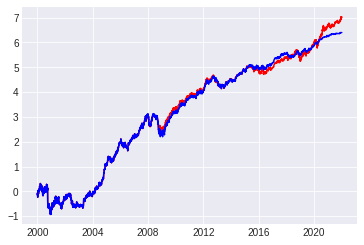

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
